# Importing the libraries

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Uploading files on google colab

In [ ]:
import zipfile
from google.colab import files
uploaded = files.upload()

Saving alone (1).csv to alone (1) (1).csv
Saving bellletstalk.csv to bellletstalk.csv
Saving chronicillness.csv to chronicillness.csv
Saving depression.csv to depression.csv
Saving fear.csv to fear (1).csv
Saving keywordsdata.csv to keywordsdata.csv
Saving loveyourself.csv to loveyourself (1).csv
Saving mallet-2.0.8.zip to mallet-2.0.8 (1).zip
Saving meditation.csv to meditation.csv
Saving mentalhealth.csv to mentalhealth.csv
Saving panic.csv to panic.csv
Saving positive.csv to positive.csv
Saving sadness (1).csv to sadness (1).csv
Saving sadness.csv to sadness.csv
Saving smile.csv to smile.csv
Saving stayhome.csv to stayhome.csv
Saving suicide.xlsx to suicide.xlsx


# Importing the dataset

In [ ]:
import io
df_fear = pd.read_csv(io.BytesIO(uploaded['fear.csv']))
df_alone = pd.read_csv(io.BytesIO(uploaded['alone (1).csv']))
df_meditation = pd.read_csv(io.BytesIO(uploaded['meditation.csv']))
df_bellletstalk = pd.read_csv(io.BytesIO(uploaded['bellletstalk.csv']))
df_suicide = pd.read_excel(io.BytesIO(uploaded['suicide.xlsx']))
df_sadness = pd.read_csv(io.BytesIO(uploaded['sadness.csv']))
df_smile= pd.read_csv(io.BytesIO(uploaded['smile.csv']))
df_stayhome= pd.read_csv(io.BytesIO(uploaded['stayhome.csv']))
df_positive= pd.read_csv(io.BytesIO(uploaded['positive.csv']))
df_mentalhealth= pd.read_csv(io.BytesIO(uploaded['mentalhealth.csv']))
df_panic= pd.read_csv(io.BytesIO(uploaded['panic.csv']))
df_chronicillness= pd.read_csv(io.BytesIO(uploaded['chronicillness.csv']))
df_depression= pd.read_csv(io.BytesIO(uploaded['depression.csv']))





In [ ]:
df_fear.head()


,User,Text,Date,Retweets,Favorites,HashTags,City
0,michaelbarata,New Blog Post: True Connection #love #connecti...,2020-07-11 16:29:35+00:00,0,0,#love #connection #fear #lawofattraction,NY
1,fvnclothing,What’s “scary” are the ppl who project their f...,2020-07-07 16:34:08+00:00,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,2020-07-07 02:34:40+00:00,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,2020-07-06 20:05:05+00:00,0,0,#bebitoblog #fear #theseuncertaintimes,NY
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,2020-06-30 12:05:40+00:00,3,2,#UnitedWeCan #citizens #communities #country #...,NY


In [ ]:
df_alone.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,_TraceDollFace_,Oh a reunion heyyy #Alone,2020-07-11 19:43:21+00:00,0,0,#Alone,NY
1,_TraceDollFace_,When we get down to the winner...I'm crying by...,2020-07-11 19:34:19+00:00,0,0,#Alone,NY
2,_TraceDollFace_,So now they pulling you if you're in danger of...,2020-07-11 19:31:32+00:00,0,2,#Alone,NY
3,_TraceDollFace_,3 people left. Day 74 #Alone,2020-07-11 18:42:48+00:00,0,2,#Alone,NY
4,_TraceDollFace_,Tireder isn't a word #Alone,2020-07-11 18:40:02+00:00,0,0,#Alone,NY


In [ ]:
df_meditation.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,jabreu69,You have the power to control your own life. ....,2020-07-11 13:49:18+00:00,0,0,#repost #meditate #meditation #awakening #love...,NY
1,adjust214wb,#gettingit4ME My MOST Important Asset is ME P8...,2020-07-11 12:09:48+00:00,0,1,#gettingit4ME #meditation #boxbreathing #OutOf...,NY
2,jabreu69,Good Night! . I have so many things to be grat...,2020-07-11 02:48:15+00:00,0,1,#blessing #blessed #positivevibes #asana #inst...,NY
3,adjust214wb,P8 W12 D6 #meditation #yoga #boxbreathing #get...,2020-07-10 10:56:17+00:00,0,0,#meditation #yoga #boxbreathing #gettingit4ME ...,NY
4,jabreu69,Good Night! . Life is all about dreaming and w...,2020-07-10 01:25:34+00:00,0,0,#blessing #blessed #positivevibes #asana #inst...,NY


In [ ]:
df_bellletstalk.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,MarleneGinader,clearly my tweet is about grumpy ppl on valent...,2020-02-21 20:47:47+00:00,0,1,#BellLetsTalk,NY
1,JCCSPORTS,"#Hockey: Wow, taken aback just now... thoughts...",2020-02-21 00:23:54+00:00,2,12,#Hockey #BellLetsTalk #NJHockey,NY
2,_MonicaTalks,Mental and life coaches will be an important p...,2020-02-05 14:22:37+00:00,0,0,#MentalHealth #Bellletstalk,NY
3,PeteSalkowski,"As you will see in this article, we unfortunat...",2020-02-02 04:22:11+00:00,1,5,#BellLetsTalk,NY
4,SarahHeartsNYC,"Man, I just watched yesterday‘s episode of #SV...",2020-02-01 03:22:23+00:00,1,1,#SVU21 #NYPD #BellLetsTalk,NY


In [ ]:
df_suicide.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,2020-07-10 17:56:18+00:00,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY
1,BelvyBenjamin,#ghislainemaxwell #epsteindidntkillhimself #je...,2020-07-08 21:26:43+00:00,0,0,#ghislainemaxwell #epsteindidntkillhimself #je...,NY
2,BelvyBenjamin,#ghislainemaxwell #footage #epsteined #epstein...,2020-07-06 15:12:57+00:00,0,0,#ghislainemaxwell #footage #epsteined #epstein...,NY
3,BelvyBenjamin,#ghislainemaxwell #hillaryclinton #epsteined #...,2020-07-04 14:04:37+00:00,0,0,#ghislainemaxwell #hillaryclinton #epsteined #...,NY
4,BelvyBenjamin,#ghislainemaxwell #epsteined #epsteindidntkill...,2020-07-02 21:10:16+00:00,0,0,#ghislainemaxwell #epsteined #epsteindidntkill...,NY


In [ ]:
df_sadness.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,sackec,Couldn’t be more accurate! The MLS will now ha...,2020-07-01 12:42:16+00:00,0,0,#getoutofnyasfastasyoucan #sadness,NY
1,JohnnyQ2497,Disney and Pixar’s Inside Out was released in ...,2020-06-20 00:00:13+00:00,3,6,#InsideOut #Pixar #Joy #Sadness #Anger #Disgus...,NY
2,PrairiesDawn,Each of my tears have a name in it. #sadness,2020-06-14 15:56:39+00:00,0,1,#sadness,NY
3,leroe24fotos,Posted withregram • hurtingsouls This gave me ...,2020-06-03 21:18:24+00:00,0,0,#blacklivesmatter #blacklivesmatter #justicefo...,NY
4,coachantonionyc,My #amore CRISTI LUCAS LEONARDO #wearamask Cro...,2020-05-25 16:13:54+00:00,0,0,#amore #wearamask #queensborobridge #sundayfun...,NY


In [ ]:
df_smile.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,queenesther,I can't stop staring at this moving snapshot o...,2020-07-11 21:02:14+00:00,0,0,#beautiful #blackwoman #smile #melaninonfleek,NY
1,alshimaahussein,That's truth #trending #truth #reality #smile ...,2020-07-11 19:11:13+00:00,0,0,#trending #truth #reality #smile #yourself #jo...,NY
2,Thomas__Art,The one person that makes me smile and laugh e...,2020-07-11 02:12:43+00:00,0,0,#thomas_art_nyc #thomas_art #iloveus #loveyous...,NY
3,GothamDogWalker,Did I just feel a raindrop? Schedule a free co...,2020-07-11 01:07:30+00:00,0,0,#DogBoarding #Dogs #Love #GothamDogWalkers #Do...,NY
4,em_bem_boo,Feeling like sunshine on this gloomy day . . ....,2020-07-10 22:34:30+00:00,0,2,#outfitinspo #ootd #americaneagle #aexme #nyc ...,NY


In [ ]:
df_stayhome.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,elizabeth_banta,homemade cuban sandwiches & strawberry daiquir...,2020-07-11 23:47:51+00:00,0,5,#stayhome #stayhome,NY
1,RaeDiamond,#stayhome #stayhome STAY THE FUCK HOME,2020-07-11 20:00:51+00:00,0,0,#stayhome #stayhome #stayhome #stayhome,NY
2,RaeDiamond,#stayhome still stands and you know it.,2020-07-11 20:00:18+00:00,0,0,#stayhome #stayhome,NY
3,inwoodgovt,#StayHome open studios continue w/ @CS_STUDIOS...,2020-07-11 18:25:14+00:00,2,3,#StayHome #StayHome,NY
4,tbrucato,I really like the Handwriting on the #Disney L...,2020-07-11 17:17:03+00:00,0,1,#Disney #PeopleWantToKnow #hamiltonmusical #ha...,NY


In [ ]:
df_positive.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,nanafrombk,when life gives you lemons. #lemons #plants #p...,2020-07-09 00:51:14+00:00,0,0,#lemons #plants #plant #sun #nature #planting ...,NY
1,MONTIKILLA,#Repost @00PN00 • • • • • • Looks like Danny w...,2020-07-07 21:20:19+00:00,0,1,#Repost #inheritance #wills #coronavirus #covi...,NY
2,00PN00,Looks like Danny won big time. #inheritance #w...,2020-07-07 20:38:43+00:00,0,0,#inheritance #wills #coronavirus #covid19 #pos...,NY
3,BronxREAgent,A word for today. #positive #positivity #fight...,2020-07-06 22:40:05+00:00,1,1,#positive #positivity #fighting #brave #ambiti...,NY
4,PelhamParkwayBX,Thank you Manager Miguel staples store #0653 @...,2020-07-05 19:26:43+00:00,0,0,#positive #copies #event,NY


In [ ]:
df_mentalhealth.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,KleenWraps,"Finally, the tools you need to tackle outdoor ...",2020-07-11 20:08:43+00:00,0,0,#fitness #ppe #coronavirus #gym #reopening #ph...,NY
1,mmaxtra,"Achieve gainz with the right form, control, qu...",2020-07-11 19:28:49+00:00,0,0,#fitnessmotivation #fitness #qualityoverquanti...,NY
2,ace292325,Killed workout today !! #SaturdayMorning #exer...,2020-07-11 18:38:24+00:00,1,1,#SaturdayMorning #exercise #fitness #workout,NY
3,sptfit,Synergy Fitness Give us a call... We’re open 8...,2020-07-11 17:27:49+00:00,0,0,#freetrial #groupfitness #outsidegroupfitness ...,NY
4,p2polefitness,Virtual Classes- Live Classes whatever you nee...,2020-07-11 17:22:45+00:00,0,0,#woodbridgenj #statenisland #nyc #p2p #poledan...,NY


In [ ]:
df_panic.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,Moosekj25,"Hey, so if Maxwell meets a premature end here ...",2020-07-10 13:34:46+00:00,0,0,#DeepStateCabal #PANIC,NY
1,fishonkikki,I hear ya. #badbussiness #gamestopfails @games...,2020-06-04 22:10:45+00:00,0,0,#badbussiness #gamestopfails #panic #preorders...,NY
2,Nikosak,#Police Sirens in the background. People hunke...,2020-06-02 03:25:18+00:00,0,1,#Police #panic #fear #pandemic #looters #Riote...,NY
3,Nikosak,NYC preparing for #Curfew. First time since #1...,2020-06-02 02:49:15+00:00,0,1,#Curfew #PANIC #Cuomo #BlackLivesMatter #Black...,NY
4,LaPerraShow,ARE YOU SERIOUS @realDonaldTrump?Is this the #...,2020-05-19 04:00:52+00:00,1,0,#best #FakeNews #TrumpAdministration #America ...,NY


In [ ]:
df_chronicillness.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,bccdny,@swimsofficial &amp; orange laces for the @mss...,2020-07-07 00:07:39+00:00,1,2,#MSAwareness #mswarrior #youdontlooksick #invi...,NY
1,Himani0118,I finished my infusion and I’m just scrolling ...,2020-07-06 16:46:40+00:00,0,0,#chronicillness #benlysta,NY
2,GoldenMoe,Yesss! thank you Anthony! Lets cont to rally i...,2020-05-09 22:22:18+00:00,2,9,#LupusWarriors #Tweet #Donate #PutOnPurple #Lu...,NY
3,eiramelocin_,memes make even the darkest of days a little b...,2020-04-29 20:51:56+00:00,0,2,#fitfibrochronicals #spooniememes #memes #spoo...,NY
4,Shanna815x,Virtual GI appt May 1st because this tube appa...,2020-04-20 23:47:10+00:00,0,0,#CureGP #chronicillness,NY


In [ ]:
df_depression.head()

,User,Text,Date,Retweets,Favorites,HashTags,City
0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,2020-07-10 17:56:18+00:00,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY
1,nishamarnath,LOVE IN THE TIME OF CORONA #Stories That Heal:...,2020-07-10 06:43:51+00:00,1,1,#Stories #Depression #WritingCommunity #COVID1...,NY
2,VerkaikCaroline,Why Rob Mack? Who is he? Why is everyone googl...,2020-07-09 20:35:34+00:00,0,0,#voiceofourchild #vooc #depression #sadness #a...,NY
3,ShirleyRilett,Mom Suffering From Traumatic Brain Injury & Po...,2020-07-07 10:41:59+00:00,0,0,#parent #mom #newmom #author #dog #depression ...,NY
4,nytchangster,Could #NewYork Finally Become a #Bike City? A ...,2020-07-06 20:54:08+00:00,0,1,#NewYork #Bike #Bicycle #Queens #SpanishFlu #D...,NY


## shape of our input

In [ ]:
print(df_fear.shape)
print(df_alone.shape)
print(df_sadness.shape)
print(df_suicide.shape)
print(df_panic.shape)
print(df_meditation.shape)
print(df_positive.shape)
print(df_stayhome.shape)
print(df_mentalhealth.shape)
print(df_sadness.shape)
print(df_depression.shape)
print(df_chronicillness.shape)
print(df_bellletstalk.shape)



(630, 7)
(304, 7)
(113, 7)
(520, 7)
(219, 7)
(3051, 7)
(1049, 7)
(21287, 7)
(14750, 7)
(113, 7)
(1281, 7)
(219, 7)
(818, 7)


# Merging all the dataset

In [ ]:
df= pd.concat([df_fear, df_alone,df_sadness,df_suicide,df_panic,df_meditation,df_bellletstalk,df_positive,df_stayhome,df_mentalhealth,df_sadness,df_depression,df_chronicillness,])

df['date'] = pd.to_datetime(df['Date']).dt.date
df['time'] = pd.to_datetime(df['Date']).dt.time
df['month_year'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')



In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06


# EDA(Exploratory data analysis)

In [ ]:
print('shape:', df.shape)
print('number of tweets:', df['Text'].nunique())
print('number of users:', df['User'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (28050, 9)
number of tweets: 28050
number of users: 10620
range: 2019-10-05 , 2020-07-11
dates: 281


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
HashTags,28,0.1


Text(0.5, 1.0, 'Number of Tweets per month')

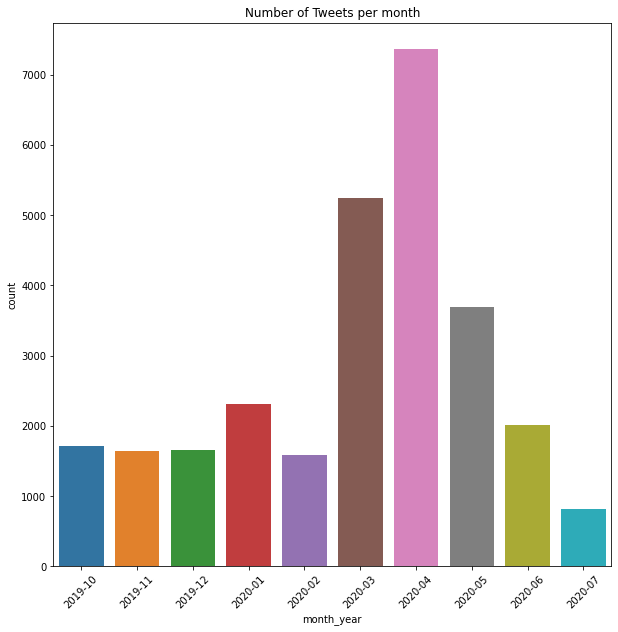

In [ ]:
# plot number of tweets everyday
fig = plt.figure(figsize = (10,10))
chart = sns.countplot(df['month_year'], order = sorted(df['month_year'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per month')

Text(0.5, 1.0, 'Number of Tweets per city')

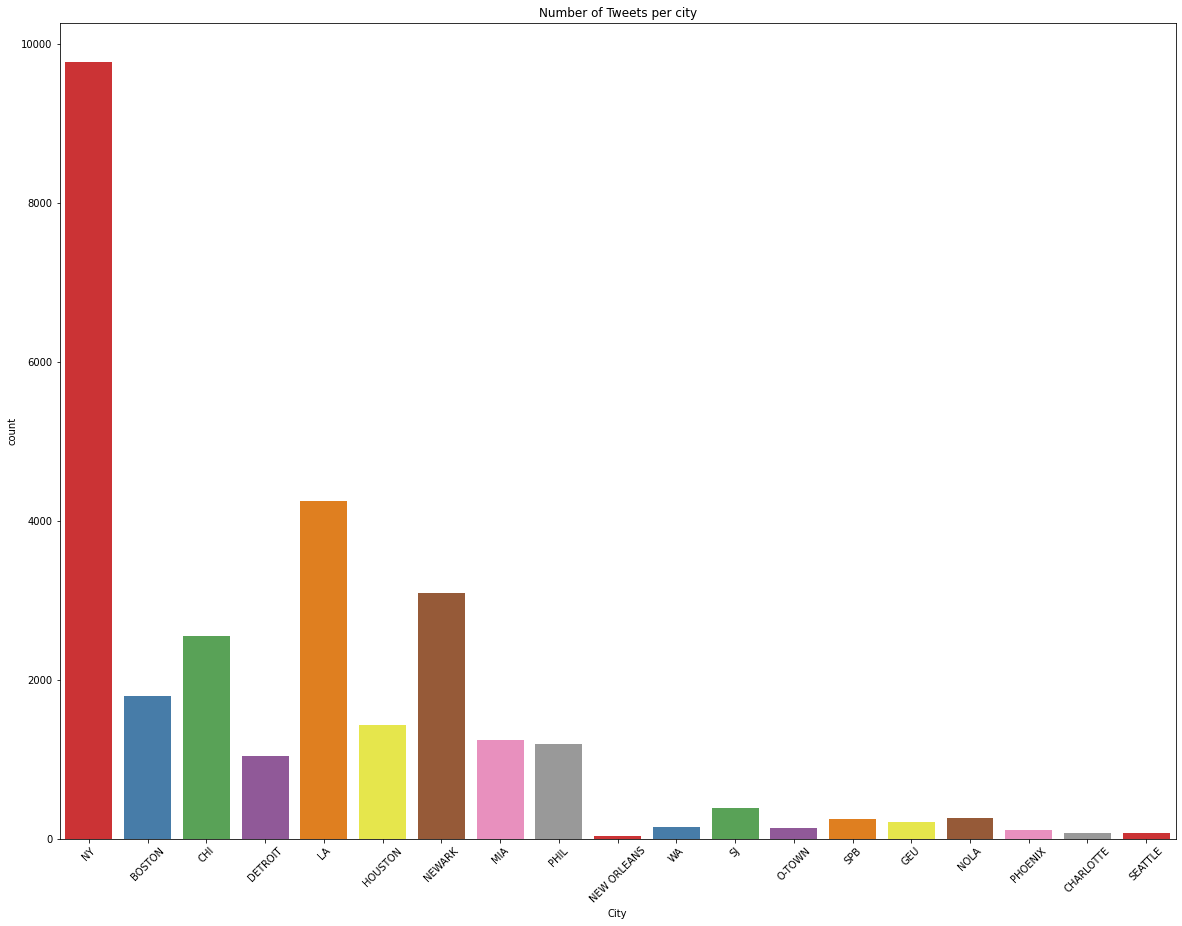

In [ ]:
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.countplot(df["City"],palette='Set1',ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per city')

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06


               Text                          ...                                
month_year  2019-10 2019-11 2019-12 2020-01  ... 2020-04 2020-05 2020-06 2020-07
City                                         ...                                
BOSTON           74      61      57      84  ...     665     242      82      29
CHARLOTTE         5       6       1      14  ...      16       3       2       0
CHI             103      88      72     137  ...     937     326     104      56
DETROIT          49      47      94     197  ...     255      84      73      23
GEU              28      27      19      22  ...      19      20      16      22
HOUSTON          85      90     141     131  ...     168     258     142      47
LA              404     415     357     566  ...     523     485     352     161
MIA             121     120     114     148  ...     112     153     137      47
NEW ORLEANS       5       1       5       1  ...       5       3       6       1
NEWARK          417     373 

Text(0.5, 1.0, 'Number of Tweets in Different Cities Groups across months')

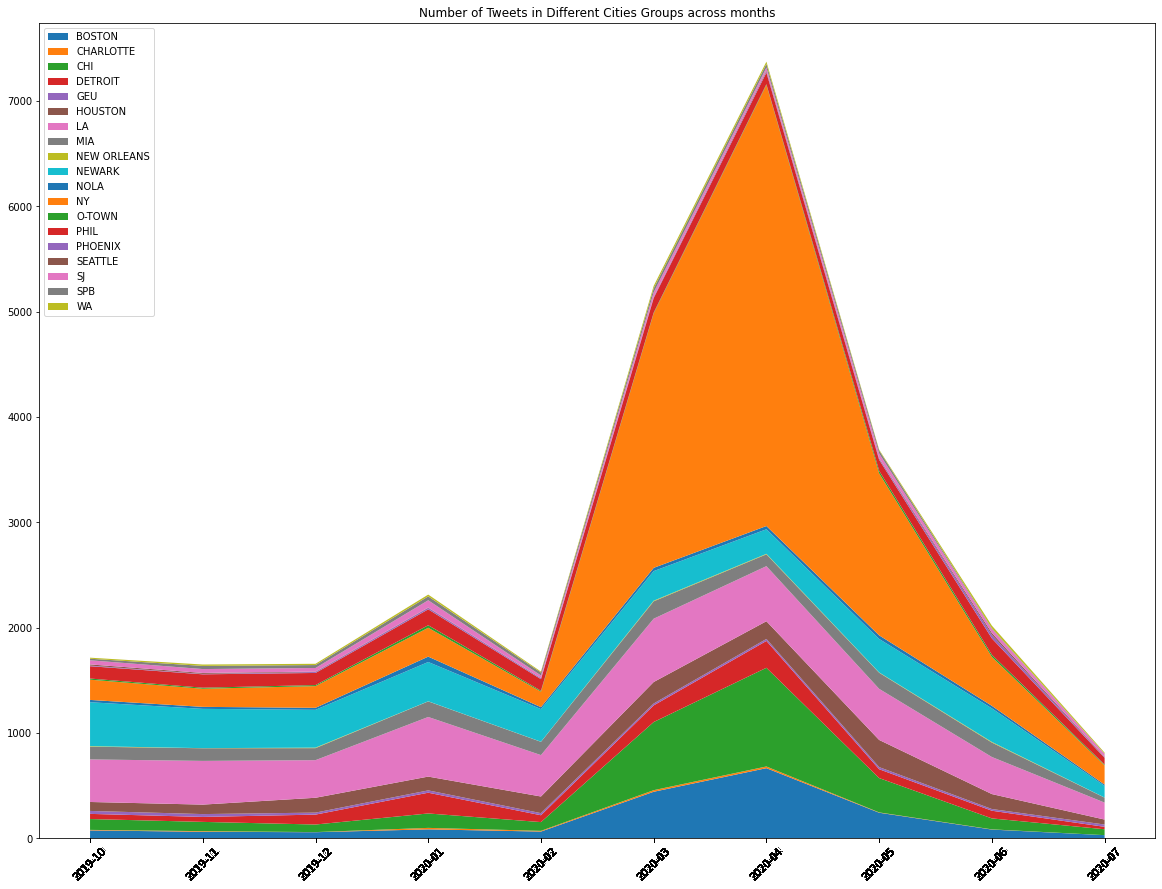

In [ ]:
# plot number of tweets everyday in each city 
pivot = pd.pivot_table(df, index=['City'],
                         columns=['month_year'],
                         values=['Text'], 
                         aggfunc = lambda x: len(x), 
                         fill_value=0)
print(pivot)
print(sorted(df['month_year'].unique()))

fig= plt.figure(figsize = (20,15))
plt.stackplot(sorted(df['month_year'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['month_year']))
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.title('Number of Tweets in Different Cities Groups across months')

In [ ]:
# extract data that doesn't contain NAs only
df = df[df['HashTags'].notna()]

# TEXT PREPROCESSING

In [ ]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [ ]:
# apply all the preprocess functions
df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

In [ ]:
# text before preprocessing
df.Text[5]

5    62 feels good. #reginaedelmanphoto #yoga #hand...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the #queensborobridge #sundayfunday w...
5    Hope I don’t end up “#missing” or on a tree ha...
5    What a couple of drama #queens only you leftis...
5    Believe what your heart tells you, not what ot...
5    #BellLetsTalk always here for everyone in my l...
5    Dear #God, I thank you for being born to #Rosa...
5     GOING LIVE! 4PM-6PM TUNE IN TO @bedvynebrew f...
5    It was hard to share my story but I realized t...
5    The deaths of #poor #BlackLivesMatter #Latinos...
Name: Text, dtype: object

In [ ]:
# text after preprocessing
df.text_nlp[5]

5    62 feels good.                  @New York, New...
5    Damn they told Dave he gotta go home. He had f...
5    Crossing the   w the  after    3 hr  so much  ...
5    Hope I don’t end up “” or on a tree hanging by...
5    What a couple of drama  only you leftists sens...
5    Believe what your heart tells you, not what ot...
5     always here for everyone in my life. Nobodys ...
5    Dear , I thank you for being born to  and , on...
5     GOING LIVE! 4PM-6PM TUNE IN TO @bedvynebrew f...
5    It was hard to share my story but I realized t...
5    The deaths of     could had been avoided in  b...
Name: text_nlp, dtype: object

In [ ]:
# Get the lenghth of text and word count
df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

In [ ]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"that\'s", "that is", phrase)   
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# decontracte words
df.text_nlp = df.text_nlp.apply(lambda x: decontracted(x).lower())

In [ ]:
# remove stop words
stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please',
               'the','would','could','can','may','must', 
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [ ]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

In [ ]:
df.text_nlp[5]

5                      62 feels good new york new york
5             damn told dave gotta go home food eating
5    crossing w 3 hr much much time bridge without ...
5             hope don t end tree hanging posted this 
5    couple drama leftists sensed panic one else di...
5             believe heart tells you others tell you 
5    always everyone life nobodys anything alone ok...
5                                     dear thank born 
5    going live 4pm 6pm tune bedvynebrew music djda...
5    hard share story realized help somebody bigger...
5    deaths avoided negligence take timely measures...
Name: text_nlp, dtype: object

# **Sentiment Analysis**

In [ ]:
# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'distribution plot')

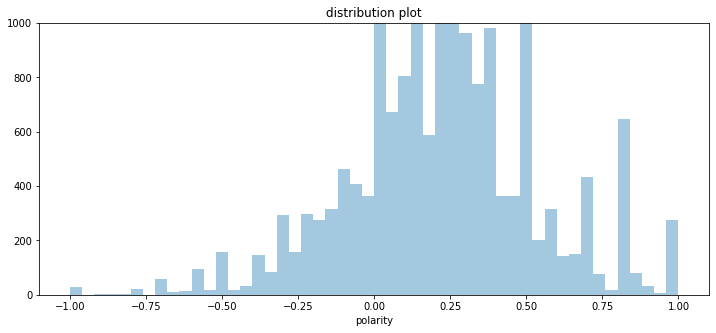

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['polarity'],kde = False)
plt.ylim(0, 1000)
plt.title("distribution plot")

In [ ]:
df[df['polarity']<-0.8]['Text']

19       There are 269,000 tons of plastic float in the...
115      Being alone isn’t the worst case scenario but ...
111      @LoriGrande3 #sadness that the world's biggest...
117      #Suicide is a devastating reality among health...
23       Make it so I don’t have to go to work, but the...
1108     U Ever Notice #DonaldTrump Would Rather Point ...
813      #BellLetsTalk @catmsilverman has seen me on so...
359       #Played all #day #time to #sleep with my #fav...
289                          Disgusted. #stayhome #COVID19
906      Those moves are looking insane!!! Mr. Galo’s h...
1411     Therapy walk after another horrible night shif...
2623     I’m honestly disgusted by the actions of these...
3864     Just got a call from the doctor I work with......
4488     Watch out! I’m vicious with the sanitizing spr...
5357     If we lose 100,000 people that’s more than Kor...
6081     This is terrifying!!! #NewYorkTough #StayHome ...
6392     Thank you @CatSteadman for Something in the Wa.

In [ ]:
# Sentiment 
df.groupby('sentiment').Text.count()

sentiment
negative     3259
neutral     10764
positive    13999
Name: Text, dtype: int64

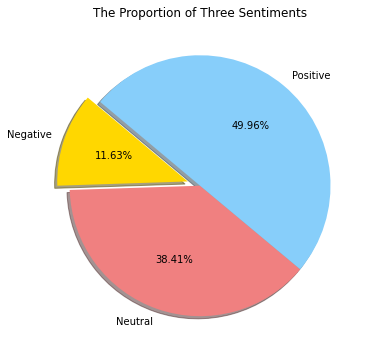

In [ ]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

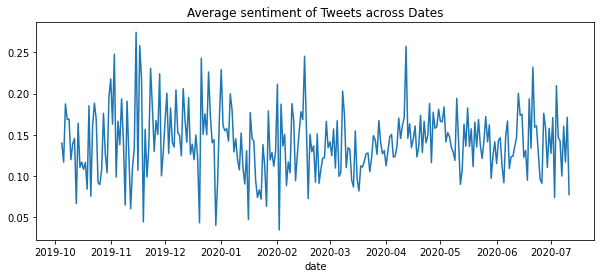

In [ ]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

# **Word Clouds**

In [ ]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 28022/28022 [00:00<00:00, 59478.23it/s]


In [ ]:
from PIL import Image
import requests
from io import BytesIO



In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
response = requests.get("https://swissmacuser.ch/wp-content/uploads/2015/09/Twitter_logo_blue.png")
mask = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
response=requests.get("https://previews.123rf.com/images/taiga/taiga1601/taiga160100031/51501178-blue-matrix-abstract-binary-code-digital-background-big-size.jpg")
color = np.array(Image.open(BytesIO(response.content)).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
#color=np.apply_along_axis(func, 2, color)

In [ ]:
add_stopwords = ['day','like','go','one','today','let','get',
 '2', '1','3','4','5','take','make','think','want','way',
'see','still', 'via', 'now','much', 'even','watch','क',
 'all','really','thing', 'every','around','here','made',
 'also','part','total', 'things',  'little','getting',
 'last','essential','long', 'another', 'look', 'next','there',
 'people','time','new','thank','need','good','going','know',
 'week','everyone','live','love','right','home','us','stay','re',
'help', 'work', 'quarantine', 'life', 'keep', 'york', "york'", 'don']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

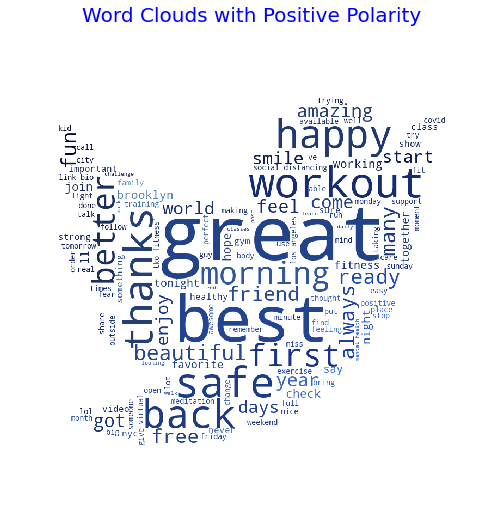

In [ ]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
image_colors = ImageColorGenerator(color)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#0000FF')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('positive.png')

In [ ]:


response=requests.get("https://images.pexels.com/photos/960137/pexels-photo-960137.jpeg?cs=srgb&dl=red-wooden-surface-960137.jpg&fm=jpg")
red = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
red=np.apply_along_axis(func, 2, red)

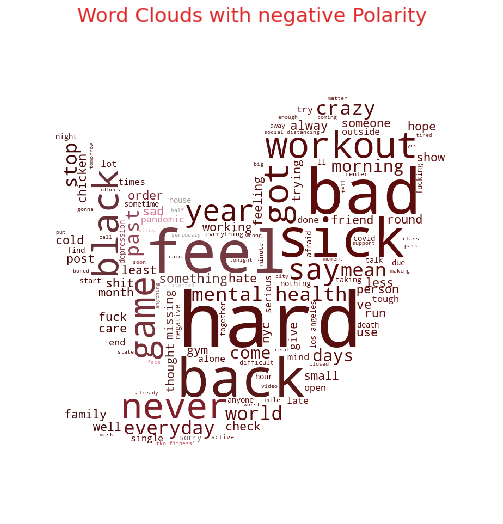

In [ ]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
    # declare our figure  
image_colors = ImageColorGenerator(red)
plt.figure(figsize=(10,9))
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('negative.png')

# **Topic Modelling**


## preprocessing for Topic Modeling¶

In [ ]:
#Installing the libraries
!pip install pyLDAvis

In [ ]:
!pip install gensim --upgrade

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [ ]:
'''import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()'''

'import os       #importing os to set environment variable\ndef install_java():\n  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk\n  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable\n  !java -version       #check java version\ninstall_java()'

In [ ]:
import zipfile
from google.colab import files
uploaded = files.upload()

Saving mallet-2.0.8.zip to mallet-2.0.8 (2).zip


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-07-27 09:40:18--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.44MB/s    in 2.8s    

2020-07-27 09:40:22 (5.44 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
import os

In [ ]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive
1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,what s scary ppl project fears onto others don...,149,26,-0.550000,negative
2,jourdaaa,JɆⱤⱤɎ ₵₳₦ A quiet mind is able to hear intuiti...,0,1,#monday #sketch #drawing #tomandjerry #blue #c...,NY,2020-07-07,02:34:40,2020-07,jɇɽɽɏ quiet mind able hear intuition fear run ...,118,21,0.193182,positive
3,BebitoToys,Some thoughts on fear... http://www.bebitotoys...,0,0,#bebitoblog #fear #theseuncertaintimes,NY,2020-07-06,20:05:05,2020-07,thoughts fear,28,4,0.000000,neutral
4,leverage_cr,#UnitedWeCan do what every we must for our #ci...,3,2,#UnitedWeCan #citizens #communities #country #...,NY,2020-06-30,12:05:40,2020-06,every it s it s it s it s go mindful one anoth...,147,33,0.000000,neutral


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
 #Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text_nlp']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')
# 'home', 'stay','new','york', 'time',
newStopWords =  ['s','t',  'm', 're','don','ve','2', '3', '1', 
                 'it', 'i', 'us', 'get', 'you', 'let', 'going', 'know', 
                'make', 'take', 'still','got', 'can', 'this', 'all', 'me','go',
                'even', 'here', 'well', 'much', 'many', 'way', 'want', 'every', 'little']
stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [ ]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## Finding the optimal number of topics using LdaMallet model

In [ ]:
start=24
limit=32
step=2
random = 155

In [ ]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# compute coherence values for each model
#mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

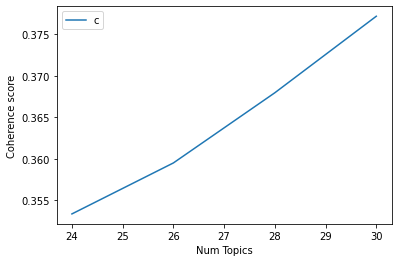

In [ ]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# The graph tell us about what number of topics to choose so we will choose 28 as it has maximum coherence score at that point

In [ ]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

#If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.
#So for further steps I will choose the model with 30 topics itself.

Num Topics = 24  has Coherence Value of 0.3534
Num Topics = 26  has Coherence Value of 0.3595
Num Topics = 28  has Coherence Value of 0.368
Num Topics = 30  has Coherence Value of 0.3772


## Finding Key Words for each topic using optimal LdaMallet model

In [ ]:
#mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=30, 
                                             id2word=id2word,
                                             random_seed = 155)

In [ ]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)

pprint(sorted(ldamallet.print_topics(num_words=4)))


[(0, '0.055*"follow" + 0.041*"post" + 0.041*"free" + 0.035*"hour"'),
 (1, '0.137*"make" + 0.095*"happy" + 0.056*"smile" + 0.045*"world"'),
 (2, '0.056*"set" + 0.053*"back" + 0.033*"goal" + 0.032*"high"'),
 (3, '0.265*"day" + 0.114*"great" + 0.108*"start" + 0.048*"beautiful"'),
 (4, '0.048*"face" + 0.042*"wear" + 0.041*"real" + 0.038*"mask"'),
 (6, '0.080*"check" + 0.071*"call" + 0.064*"watch" + 0.060*"show"'),
 (8, '0.102*"today" + 0.078*"fitness" + 0.061*"training" + 0.044*"gym"'),
 (9, '0.178*"people" + 0.076*"life" + 0.031*"save" + 0.021*"virus"'),
 (10, '0.288*"time" + 0.071*"find" + 0.046*"long" + 0.046*"end"'),
 (11, '0.044*"eat" + 0.030*"full" + 0.026*"food" + 0.020*"episode"'),
 (13, '0.143*"feel" + 0.085*"give" + 0.053*"strong" + 0.041*"bad"'),
 (14, '0.095*"year" + 0.044*"month" + 0.029*"die" + 0.029*"person"'),
 (15, '0.249*"work" + 0.061*"hard" + 0.057*"mind" + 0.051*"put"'),
 (16, '0.199*"love" + 0.102*"friend" + 0.068*"family" + 0.051*"listen"'),
 (18, '0.068*"health" + 0

In [ ]:
topics = pd.DataFrame(sorted(ldamallet.print_topics(num_words=4)))
topics.columns = ['Topic_num','Key_words']
topics.to_csv('30_topics_2.csv',index = False)

In [ ]:
topics.head()
#This csv tell us about the keywords about each topic
'''
here in 0.171*"people" 
0.0171 is percentage score
and "people" is keyboard 
'''

'\nhere in 0.171*"people" \n0.0171 is percentage score\nand "people" is keyboard \n'

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
#More the coherence score more is better keywords


Coherence Score:  0.37719615696352765


## Topic vector

### Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.

In [ ]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["text_nlp"]):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = sent_topics_df.join(contents)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["text_nlp"])
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show


In [ ]:
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,25.0,0.0494,"follow, social, post, practice, check, easy, d...",new blog post true connection
1,0,25.0,0.0494,"follow, social, post, practice, check, easy, d...",oh reunion heyyy
2,0,25.0,0.0494,"follow, social, post, practice, check, easy, d...",couldn t accurate mls new home listing thanks ...
3,0,25.0,0.0494,"follow, social, post, practice, check, easy, d...",goldenrulewill via lovewillam_ atrainlive make...
4,0,25.0,0.0494,"follow, social, post, practice, check, easy, d...",hey maxwell meets premature end near future on...
...,...,...,...,...,...
95,8,13.0,0.0643,"learn, open, fun, long, studio, person, perfec...",kenzie believes got this full episode pn frien...
96,8,13.0,0.0643,"learn, open, fun, long, studio, person, perfec...",open studios continue w cs_studios_nyc 7 30pm ...
97,8,13.0,0.0643,"learn, open, fun, long, studio, person, perfec...",today sometimes work today one times
98,8,13.0,0.0643,"learn, open, fun, long, studio, person, perfec...",warriors this includes you


In [ ]:
df_dominant_topic.to_csv('df_dominant_topic.csv') 
files.download('df_dominant_topic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2386,"eat, make, food, water, dinner, meal, bar, fre...",april 2nd sunset thankful beautiful evening we...
1,1.0,0.1306,"work, hard, lot, kid, read, lol, pay, teach, p...",working christmas hams equinox brooklyn heights
2,2.0,0.1517,"stay, home, safe, healthy, hope, fit, active, ...",selfie video needed cardio today
3,3.0,0.1649,"good, morning, night, weekend, great, early, d...",mom better mom sent favorite cookies tiffstrea...
4,4.0,0.2438,"today, strong, place, death, case, state, win,...",spent lot time texting laptop


In [ ]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2386,"eat, make, food, water, dinner, meal, bar, fre...",april 2nd sunset thankful beautiful evening we...
1,1.0,0.1306,"work, hard, lot, kid, read, lol, pay, teach, p...",working christmas hams equinox brooklyn heights
2,2.0,0.1517,"stay, home, safe, healthy, hope, fit, active, ...",selfie video needed cardio today
3,3.0,0.1649,"good, morning, night, weekend, great, early, d...",mom better mom sent favorite cookies tiffstrea...
4,4.0,0.2438,"today, strong, place, death, case, state, win,...",spent lot time texting laptop
5,5.0,0.1770,"body, ready, mind, change, gym, train, top, se...",n v b r giving thanks every day love holiday s...
6,6.0,0.1347,"day, make, start, big, enjoy, yesterday, movem...",well felt like bellini s new york new york
7,7.0,0.2110,"move, positive, high, remember, light, forward...",NaN
8,8.0,0.1444,"give, life, put, moment, build, true, buy, hai...",one week ago many things change one week let s...
9,9.0,0.1667,"today, wait, video, book, link, check, bio, fe...",NaN


In [ ]:
sent_topics_sorteddf_mallet.to_csv('sent_topics_sorteddf_mallet.csv') 
files.download('sent_topics_sorteddf_mallet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The tabular output above actually has 25 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. The Perc_Contribution column is nothing but the percentage contribution of the topic in the given document.

### Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

#Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics=df_dominant_topics.drop_duplicates()
# Show
print(df_dominant_topics)


       Dominant_Topic  ... Perc_Documents
0.0              25.0  ...         0.1683
1.0              22.0  ...         0.0371
2.0               9.0  ...         0.0380
3.0               7.0  ...         0.0393
4.0              17.0  ...         0.0277
5.0              26.0  ...         0.0314
6.0               1.0  ...         0.0329
7.0               3.0  ...         0.0327
8.0              13.0  ...         0.0282
9.0              27.0  ...         0.0330
10.0             12.0  ...         0.0339
11.0             12.0  ...         0.0264
12.0              0.0  ...         0.0296
13.0              0.0  ...         0.0258
14.0             28.0  ...         0.0322
15.0             13.0  ...         0.0318
16.0             20.0  ...         0.0232
17.0              6.0  ...         0.0254
18.0             23.0  ...         0.0268
19.0              9.0  ...         0.0261
20.0              0.0  ...         0.0254
21.0             23.0  ...         0.0232
22.0             27.0  ...        

In [ ]:
df_dominant_topics.to_csv('df_dominant_topics.csv') 
files.download('df_dominant_topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Topic modelling analysis

In [ ]:
print(df_dominant_topic.shape)
print(df.shape)

(35159, 5)
(28022, 14)


In [ ]:
topic_names=sent_topics_sorteddf_mallet["Keywords"]

In [ ]:
topic_names=list(topic_names)

In [ ]:
print(topic_names)

['eat, make, food, water, dinner, meal, bar, fresh, hot, coffee', 'work, hard, lot, kid, read, lol, pay, teach, progress, success', 'stay, home, safe, healthy, hope, fit, active, inside, maintain, stick', 'good, morning, night, weekend, great, early, dream, job, wake, sleep', 'today, strong, place, death, case, state, win, number, finish, focus', 'body, ready, mind, change, gym, train, top, set, shirt, strength', 'day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy', 'move, positive, high, remember, light, forward, thought, late, action, test', 'give, life, put, moment, build, true, buy, hair, system, worth', 'today, wait, video, book, link, check, bio, fear, inspire, miss', 'watch, man, hear, woman, deal, depression, story, thing, struggle, anxiety', 'fitness, training, start, week, online, sign, personal, session, special, free', 'year, face, month, hit, create, heart, ago, dance, art, season', 'learn, open, fun, long, studio, person, perfect, point, matter

### Combining the topic names with or original dataset

In [ ]:
topics_docs = []
for m in ldamallet[corpus]:
    topics_docs.append(m)

train_vecs = []
for i in topics_docs:
    topic_vec = [j[1] for j in i]
    train_vecs.append(topic_vec) 

topic_dis = pd.DataFrame(train_vecs,columns=topic_names)
topic_dis.head()

df= df.join(topic_dis)
df.head(2)

,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment,"eat, make, food, water, dinner, meal, bar, fresh, hot, coffee","work, hard, lot, kid, read, lol, pay, teach, progress, success","stay, home, safe, healthy, hope, fit, active, inside, maintain, stick","good, morning, night, weekend, great, early, dream, job, wake, sleep","today, strong, place, death, case, state, win, number, finish, focus","body, ready, mind, change, gym, train, top, set, shirt, strength","day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy","move, positive, high, remember, light, forward, thought, late, action, test","give, life, put, moment, build, true, buy, hair, system, worth","today, wait, video, book, link, check, bio, fear, inspire, miss","watch, man, hear, woman, deal, depression, story, thing, struggle, anxiety","fitness, training, start, week, online, sign, personal, session, special, free","year, face, month, hit, create, heart, ago, dance, art, season","learn, open, fun, long, studio, person, perfect, point, matter, everyday","love, happy, smile, real, world, send, birthday, reason, celebrate, mom","people, stop, die, virus, kill, crazy, country, hold, neighbor, drive","life, find, end, play, save, part, game, business, small, close","live, tonight, pm, wear, mask, word, music, tune, join, share","workout, exercise, set, side, push, minute, rest, leg, weight, squat","week, full, challenge, lose, goal, leave, step, eye, episode, pretty","time, thing, hour, hand, long, forget, spend, bring, normal, tough","call, meditation, amazing, schedule, info, message, visit, happy, center, beautiful","health, talk, mental, important, pain, young, shoot, issue, lead, care","show, support, favorite, continue, enjoy, bring, rise, community, grow, black","run, today, walk, beautiful, double, mile, park, nice, tap, team","follow, social, post, practice, check, easy, distancing, quarantine, distance, provide","feel, back, great, happen, guy, bad, thing, reach, finally, super","essential, worker, care, store, risk, line, patient, doctor, room, service","class, order, join, tomorrow, free, virtual, yoga, peace, delivery, pick","friend, family, listen, share, daily, live, member, photo, awareness, include"
0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,oh reunion heyyy,19,4,0.000000,neutral,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864


In [ ]:
df.shape

(28022, 44)

In [ ]:
df.to_csv('df.csv') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Finding polarity of all 25 topics

In [ ]:

topic_list = df.columns[14:39]
topic_mean = df.iloc[:,14:39].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.08,1,0)
    
topic_polarity = list()
for i in range(25):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity=topic_polarity.sort_values(by = ['Polarity'],ascending=False)
topic_polarity.head()

,Topics,Polarity
18,"workout, exercise, set, side, push, minute, re...",0.179871
20,"time, thing, hour, hand, long, forget, spend, ...",0.179742
2,"stay, home, safe, healthy, hope, fit, active, ...",0.176307
22,"health, talk, mental, important, pain, young, ...",0.176224
3,"good, morning, night, weekend, great, early, d...",0.163909


In [ ]:
from google.colab import files
topic_polarity.to_csv('topic_polarity.csv') 
files.download('topic_polarity.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA on output :

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv("df.csv")
dominant_topic=pd.read_csv("df_dominant_topic.csv")
dominant_topics=pd.read_csv("df_dominant_topics.csv")
sent_topics_sorteddf_mallet=pd.read_csv("sent_topics_sorteddf_mallet.csv")
topic_polarity=pd.read_csv("topic_polarity.csv")

In [ ]:
df.head(10)

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment,"eat, make, food, water, dinner, meal, bar, fresh, hot, coffee","work, hard, lot, kid, read, lol, pay, teach, progress, success","stay, home, safe, healthy, hope, fit, active, inside, maintain, stick","good, morning, night, weekend, great, early, dream, job, wake, sleep","today, strong, place, death, case, state, win, number, finish, focus","body, ready, mind, change, gym, train, top, set, shirt, strength","day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy","move, positive, high, remember, light, forward, thought, late, action, test","give, life, put, moment, build, true, buy, hair, system, worth","today, wait, video, book, link, check, bio, fear, inspire, miss","watch, man, hear, woman, deal, depression, story, thing, struggle, anxiety","fitness, training, start, week, online, sign, personal, session, special, free","year, face, month, hit, create, heart, ago, dance, art, season","learn, open, fun, long, studio, person, perfect, point, matter, everyday","love, happy, smile, real, world, send, birthday, reason, celebrate, mom","people, stop, die, virus, kill, crazy, country, hold, neighbor, drive","life, find, end, play, save, part, game, business, small, close","live, tonight, pm, wear, mask, word, music, tune, join, share","workout, exercise, set, side, push, minute, rest, leg, weight, squat","week, full, challenge, lose, goal, leave, step, eye, episode, pretty","time, thing, hour, hand, long, forget, spend, bring, normal, tough","call, meditation, amazing, schedule, info, message, visit, happy, center, beautiful","health, talk, mental, important, pain, young, shoot, issue, lead, care","show, support, favorite, continue, enjoy, bring, rise, community, grow, black","run, today, walk, beautiful, double, mile, park, nice, tap, team","follow, social, post, practice, check, easy, distancing, quarantine, distance, provide","feel, back, great, happen, guy, bad, thing, reach, finally, super","essential, worker, care, store, risk, line, patient, doctor, room, service","class, order, join, tomorrow, free, virtual, yoga, peace, delivery, pick","friend, family, listen, share, daily, live, member, photo, awareness, include"
0,0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
1,0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,oh reunion heyyy,19,4,0.000000,neutral,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
2,0,sackec,Couldn’t be more accurate! The MLS will now ha...,0,0,#getoutofnyasfastasyoucan #sadness,NY,2020-07-01,12:42:16,2020-07,couldn t accurate mls new home listing thanks ...,139,24,0.245455,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
3,0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY,2020-07-10,17:56:18,2020-07,goldenrulewill via lovewillam_ atrainlive make...,95,12,0.136364,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037

In [ ]:

df=df.dropna()

In [ ]:
df.shape

(27998, 45)

In [ ]:

df.columns

Index(['Unnamed: 0', 'User', 'Text', 'Retweets', 'Favorites', 'HashTags',
       'City', 'date', 'time', 'month_year', 'text_nlp', 'text_len',
       'word_count', 'polarity', 'sentiment',
       'eat, make, food, water, dinner, meal, bar, fresh, hot, coffee',
       'work, hard, lot, kid, read, lol, pay, teach, progress, success',
       'stay, home, safe, healthy, hope, fit, active, inside, maintain, stick',
       'good, morning, night, weekend, great, early, dream, job, wake, sleep',
       'today, strong, place, death, case, state, win, number, finish, focus',
       'body, ready, mind, change, gym, train, top, set, shirt, strength',
       'day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy',
       'move, positive, high, remember, light, forward, thought, late, action, test',
       'give, life, put, moment, build, true, buy, hair, system, worth',
       'today, wait, video, book, link, check, bio, fear, inspire, miss',
       'watch, man, hear, woman

In [ ]:
df.head()

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment,"eat, make, food, water, dinner, meal, bar, fresh, hot, coffee","work, hard, lot, kid, read, lol, pay, teach, progress, success","stay, home, safe, healthy, hope, fit, active, inside, maintain, stick","good, morning, night, weekend, great, early, dream, job, wake, sleep","today, strong, place, death, case, state, win, number, finish, focus","body, ready, mind, change, gym, train, top, set, shirt, strength","day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy","move, positive, high, remember, light, forward, thought, late, action, test","give, life, put, moment, build, true, buy, hair, system, worth","today, wait, video, book, link, check, bio, fear, inspire, miss","watch, man, hear, woman, deal, depression, story, thing, struggle, anxiety","fitness, training, start, week, online, sign, personal, session, special, free","year, face, month, hit, create, heart, ago, dance, art, season","learn, open, fun, long, studio, person, perfect, point, matter, everyday","love, happy, smile, real, world, send, birthday, reason, celebrate, mom","people, stop, die, virus, kill, crazy, country, hold, neighbor, drive","life, find, end, play, save, part, game, business, small, close","live, tonight, pm, wear, mask, word, music, tune, join, share","workout, exercise, set, side, push, minute, rest, leg, weight, squat","week, full, challenge, lose, goal, leave, step, eye, episode, pretty","time, thing, hour, hand, long, forget, spend, bring, normal, tough","call, meditation, amazing, schedule, info, message, visit, happy, center, beautiful","health, talk, mental, important, pain, young, shoot, issue, lead, care","show, support, favorite, continue, enjoy, bring, rise, community, grow, black","run, today, walk, beautiful, double, mile, park, nice, tap, team","follow, social, post, practice, check, easy, distancing, quarantine, distance, provide","feel, back, great, happen, guy, bad, thing, reach, finally, super","essential, worker, care, store, risk, line, patient, doctor, room, service","class, order, join, tomorrow, free, virtual, yoga, peace, delivery, pick","friend, family, listen, share, daily, live, member, photo, awareness, include"
0,0,michaelbarata,New Blog Post: True Connection #love #connecti...,0,0,#love #connection #fear #lawofattraction,NY,2020-07-11,16:29:35,2020-07,new blog post true connection,34,5,0.243182,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
1,0,_TraceDollFace_,Oh a reunion heyyy #Alone,0,0,#Alone,NY,2020-07-11,19:43:21,2020-07,oh reunion heyyy,19,4,0.000000,neutral,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
2,0,sackec,Couldn’t be more accurate! The MLS will now ha...,0,0,#getoutofnyasfastasyoucan #sadness,NY,2020-07-01,12:42:16,2020-07,couldn t accurate mls new home listing thanks ...,139,24,0.245455,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037037,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.045267,0.030864,0.049383,0.030864,0.030864,0.030864,0.030864
3,0,MamaAlboranista,#Repost goldenrulewill ・・・ via @lovewillam_ #R...,0,2,#Repost #Repost #suicideawarness #suicide #dep...,NY,2020-07-10,17:56:18,2020-07,goldenrulewill via lovewillam_ atrainlive make...,95,12,0.136364,positive,0.030864,0.030864,0.030864,0.032922,0.030864,0.030864,0.030864,0.030864,0.04321,0.047325,0.030864,0.030864,0.030864,0.032922,0.037

In [ ]:

df_neg=df[df["sentiment"]=="negative"]

In [ ]:
df_neg.shape

(3259, 45)

In [ ]:
df_neg.head(2)

,Unnamed: 0,User,Text,Retweets,Favorites,HashTags,City,date,time,month_year,text_nlp,text_len,word_count,polarity,sentiment,"eat, make, food, water, dinner, meal, bar, fresh, hot, coffee","work, hard, lot, kid, read, lol, pay, teach, progress, success","stay, home, safe, healthy, hope, fit, active, inside, maintain, stick","good, morning, night, weekend, great, early, dream, job, wake, sleep","today, strong, place, death, case, state, win, number, finish, focus","body, ready, mind, change, gym, train, top, set, shirt, strength","day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy","move, positive, high, remember, light, forward, thought, late, action, test","give, life, put, moment, build, true, buy, hair, system, worth","today, wait, video, book, link, check, bio, fear, inspire, miss","watch, man, hear, woman, deal, depression, story, thing, struggle, anxiety","fitness, training, start, week, online, sign, personal, session, special, free","year, face, month, hit, create, heart, ago, dance, art, season","learn, open, fun, long, studio, person, perfect, point, matter, everyday","love, happy, smile, real, world, send, birthday, reason, celebrate, mom","people, stop, die, virus, kill, crazy, country, hold, neighbor, drive","life, find, end, play, save, part, game, business, small, close","live, tonight, pm, wear, mask, word, music, tune, join, share","workout, exercise, set, side, push, minute, rest, leg, weight, squat","week, full, challenge, lose, goal, leave, step, eye, episode, pretty","time, thing, hour, hand, long, forget, spend, bring, normal, tough","call, meditation, amazing, schedule, info, message, visit, happy, center, beautiful","health, talk, mental, important, pain, young, shoot, issue, lead, care","show, support, favorite, continue, enjoy, bring, rise, community, grow, black","run, today, walk, beautiful, double, mile, park, nice, tap, team","follow, social, post, practice, check, easy, distancing, quarantine, distance, provide","feel, back, great, happen, guy, bad, thing, reach, finally, super","essential, worker, care, store, risk, line, patient, doctor, room, service","class, order, join, tomorrow, free, virtual, yoga, peace, delivery, pick","friend, family, listen, share, daily, live, member, photo, awareness, include"
10,1,fvnclothing,What’s “scary” are the ppl who project their f...,0,0,#Enlightenment #fear #grateful #grateful #oppo...,NY,2020-07-07,16:34:08,2020-07,what s scary ppl project fears onto others don...,149,26,-0.55,negative,0.029762,0.039683,0.029762,0.029762,0.029762,0.029762,0.029762,0.029762,0.031746,0.047619,0.035714,0.029762,0.029762,0.029762,0.039683,0.029762,0.029762,0.029762,0.029762,0.029762,0.03373,0.029762,0.085317,0.029762,0.029762,0.029762,0.029762,0.031746,0.029762,0.029762
11,1,_TraceDollFace_,When we get down to the winner...I'm crying by...,0,0,#Alone,NY,2020-07-11,19:34:19,2020-07,get winner i crying time find,82,16,-0.20,negative,0.029762,0.039683,0.029762,0.029762,0.029762,0.029762,0.029762,0.029762,0.031746,0.047619,0.035714,0.029762,0.029762,0.029762,0.039683,0.029762,0.029762,0.029762,0.029762,0.029762,0.03373,0.029762,0.085317,0.029762,0.029762,0.029762,0.029762,0.031746,0.029762,0.029762


In [ ]:

df_neg.columns

Index(['Unnamed: 0', 'User', 'Text', 'Retweets', 'Favorites', 'HashTags',
       'City', 'date', 'time', 'month_year', 'text_nlp', 'text_len',
       'word_count', 'polarity', 'sentiment',
       'eat, make, food, water, dinner, meal, bar, fresh, hot, coffee',
       'work, hard, lot, kid, read, lol, pay, teach, progress, success',
       'stay, home, safe, healthy, hope, fit, active, inside, maintain, stick',
       'good, morning, night, weekend, great, early, dream, job, wake, sleep',
       'today, strong, place, death, case, state, win, number, finish, focus',
       'body, ready, mind, change, gym, train, top, set, shirt, strength',
       'day, make, start, big, enjoy, yesterday, movement, wonderful, difference, busy',
       'move, positive, high, remember, light, forward, thought, late, action, test',
       'give, life, put, moment, build, true, buy, hair, system, worth',
       'today, wait, video, book, link, check, bio, fear, inspire, miss',
       'watch, man, hear, woman

Text(0.5, 1.0, 'Number of Tweets per city')

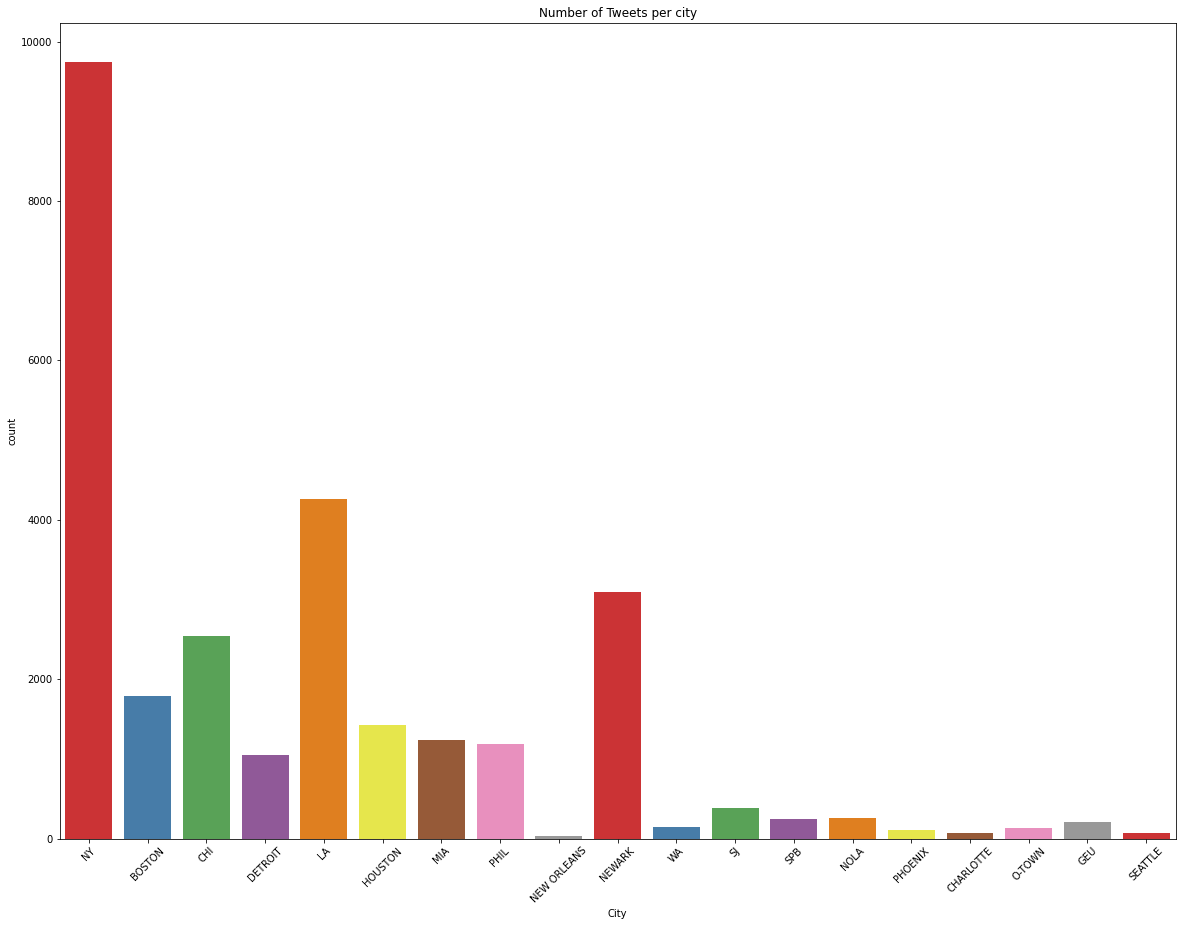

In [ ]:

fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.countplot(df["City"],palette='Set1',ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per city')

Text(0.5, 1.0, 'Number of negative Tweets per month')

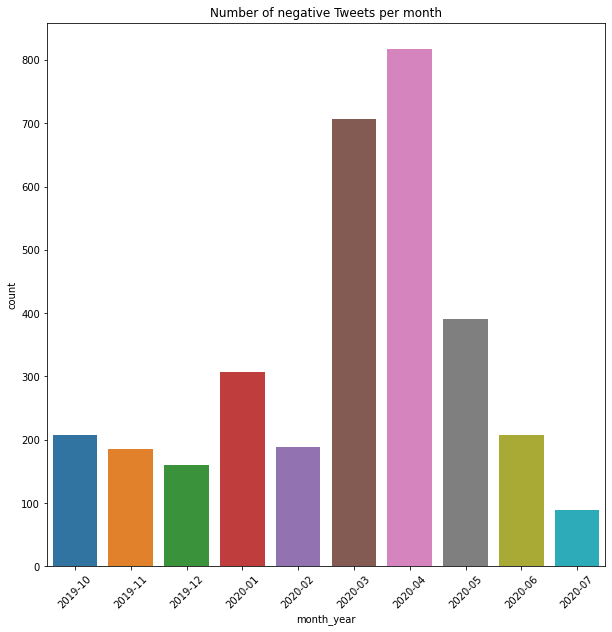

In [ ]:
fig = plt.figure(figsize = (10,10))
chart = sns.countplot(df_neg['month_year'], order = sorted(df['month_year'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

chart.set_title('Number of negative Tweets per month')

Text(0.5, 1.0, 'Number of Negative Tweets per month in every city')

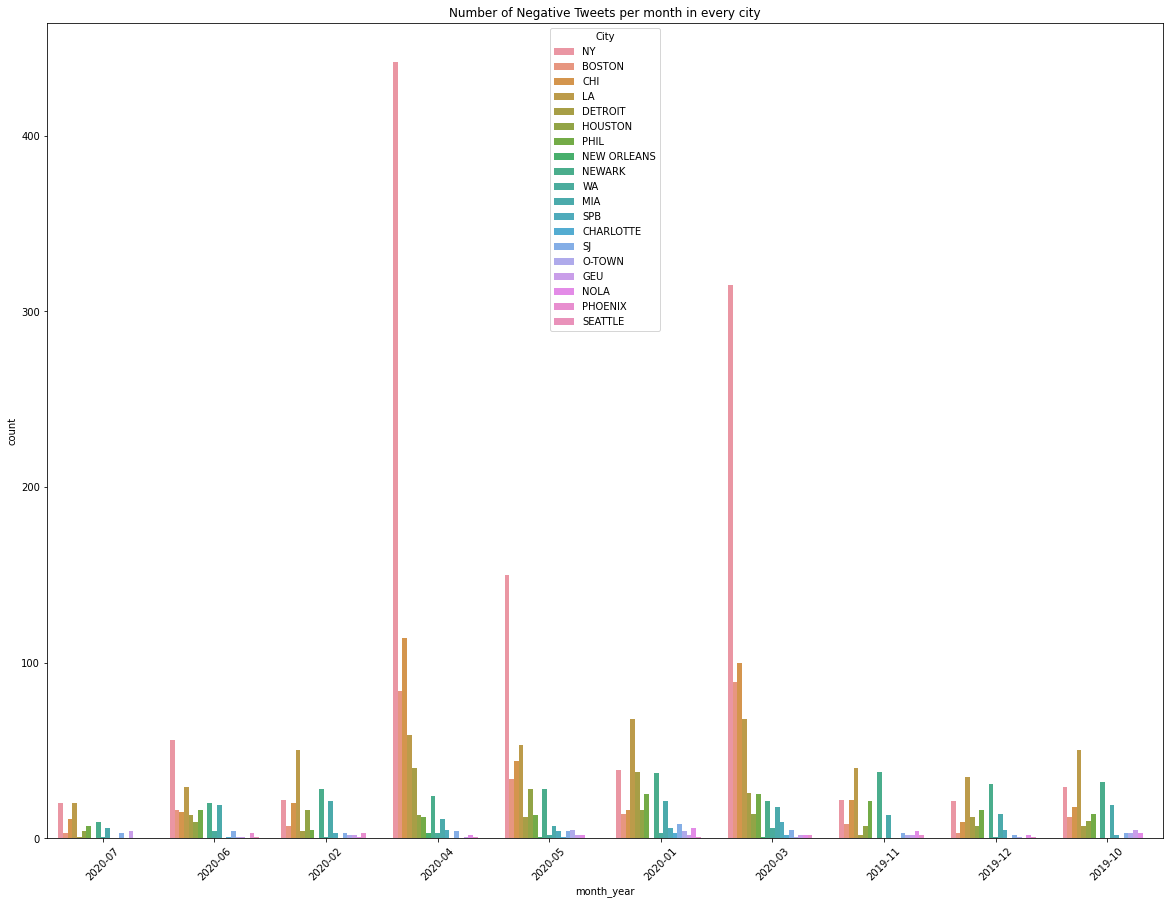

In [ ]:
'''sns.set()
_=plt.hist([df_neg["month_year"][df_neg["City"]=="NY"],df_neg["month_year"][df_neg["City"]=="LA"]],rwidth=0.95,label=["NY","LA"])
plt.xlabel("Men vs Women")
plt.ylabel("frequency")
plt.title("gender comparison")
plt.legend()
plt.show()'''
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)

chart=sns.countplot(x ='month_year', hue = "City", data = df_neg)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Negative Tweets per month in every city')

In [ ]:
topic_list = df.columns[15:40]
topic_mean = df.iloc[:,15:40].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.08,1,0)
    
topic_polarity = list()
for i in range(25):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity.sort_values(by = ['Polarity'],ascending=False)

,Topics,Polarity
18,"workout, exercise, set, side, push, minute, re...",0.179871
20,"time, thing, hour, hand, long, forget, spend, ...",0.179742
2,"stay, home, safe, healthy, hope, fit, active, ...",0.176307
22,"health, talk, mental, important, pain, young, ...",0.176224
3,"good, morning, night, weekend, great, early, d...",0.163909
6,"day, make, start, big, enjoy, yesterday, movem...",0.157717
13,"learn, open, fun, long, studio, person, perfec...",0.155951
1,"work, hard, lot, kid, read, lol, pay, teach, p...",0.154446
17,"live, tonight, pm, wear, mask, word, music, tu...",0.150429
21,"call, meditation, amazing, schedule, info, mes...",0.148670


In [ ]:
topic_polarity.to_csv("topic_polarity1.csv")

In [ ]:
negative_topics=topic_polarity[topic_polarity["Polarity"]<0.133019]

In [ ]:
most_negative_topics=negative_topics["Topics"]

# Notebook created by Archit Bansal
contact me:

[linkedin](www.linkedin.com/in/archit-bansal-3248b0162)


Really grateful to **Aradhana** and **pradeep** who helped me to complete my work